## Lab 3 (January 24):
### Data Visualization 3 (Statistical Transformations, Position Adjustments, Coordinates) & Data Transformation

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>

  Today, we are going to look at:   
 **Data Manipulation**
 - [Filter]()
 - [Select]()
 - [Arrange]()  
 - [Slice]()



 






  
 **Data Visualization**
 - [Statistical Transformations]()
 - [Position Adjustments]()
 - [Geometric Objects]()   

> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [75]:
install.packages("gapminder")                      ## Use the install.packages("<PACKAGE NAME>") command to install packages in R
library(gapminder)                                 ## To load a package (already installed) use the library(<PACKAGE NAME>) command
library(tidyverse)       
options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



> ## Next, we load our dataset for this lab

In [76]:
## Diamonds data
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [77]:
## gapminder Dataset
head(gapminder)
 

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [78]:
## iris Dataset
head(iris) 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


---

<br> <br>


# 1. Data Manipulation

Before we start touching our data for analysis, it is important to understand the structure of our data.  
Commomn variable types include:  

| Variable type| Description| Validation | Conversion|
|:---   |:---|:---|:---|
|`int` | stands for integers eg: `4L, 13L`. "L" signifies `int` | `is.integer(<NAME>)`  | `as.integer(<NAME>)`
|`dbl` | stands for doubles, or real numbers eg: `1.56, 1.89, 73.2`| `is.double(<NAME>)` | `as.double(<NAME>)` |
|`chr`    | stands for character vectors, or strings eg: `"A", "Hello", "123"`| `is.character(<NAME>)` | `as.character(<NAME>)` |
|`lgl` | stands for logical, vectors that contain only TRUE or FALSE| `is.logical(<NAME>)` | `as.logical(<NAME>)` |
|`fctr` |  stands for factors or categorical variables  eg: `factor(c("Male", "Female"))`| `is.factor(<NAME>)` | `as.factor(<NAME>)` |\
|`numeric` | stands for factors eg: `23.44, 120, NaN, Inf`| `is.numeric(<NAME>)` | `as.numeric(<NAME>)` |


<br>
Other useful functions for data exploration include:  

- `class()` - Class of data object 
- `dim()` - Dimensions of data 
- `names()` - Column names 
- `str()` - Preview of data with helpful details 
- `glimpse()` - Better version of str() from dplyr 
- `summary()` - Summary of data


_Source: DataCamp_

## Example

In [79]:
## check the dimention of the dataset
dim(gapminder)

[1] 1704    6

In [80]:
## Check the column names of the dataset
colnames(gapminder)

[1] "country"   "continent" "year"      "lifeExp"   "pop"       "gdpPercap"

In [81]:
## check the summary statistics of the dataset
summary(gapminder)

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [82]:
## check the data structure
glimpse(gapminder) # compare with str(gapminder)

Rows: 1,704
Columns: 6
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


## 1.1 Filter
We use the `filter` function to subset rows meeting a specified criteria.  
We usually use this with the help of: 

1. Relational operators:
- `>, >=, <, <=, !=` (not equal), `== (equal)`   

2. Logical operators:
- `&, |, !, xor()` and a variant `%in%`

2. Helper Functions:
- `is.na(), between(), near()`




The Venn Diagram below may be useful in helping us understand combining Logical operators in our `filtering` criteria:

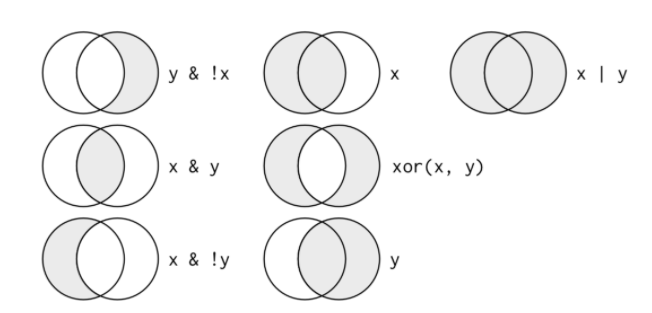

### Example 1.1.1 (Logiacal and Relational Operators)

In [83]:
## Filter only European countries
filter(gapminder, continent == "Europe")
gapminder[gapminder$continent == "Europe", ]  ## option 2 (Base-R approach)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Albania,Europe,1952,55.230,1282697,1601.056
Albania,Europe,1957,59.280,1476505,1942.284
Albania,Europe,1962,64.820,1728137,2312.889
Albania,Europe,1967,66.220,1984060,2760.197
Albania,Europe,1972,67.690,2263554,3313.422
Albania,Europe,1977,68.930,2509048,3533.004
Albania,Europe,1982,70.420,2780097,3630.881
Albania,Europe,1987,72.000,3075321,3738.933
Albania,Europe,1992,71.581,3326498,2497.438


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Albania,Europe,1952,55.230,1282697,1601.056
Albania,Europe,1957,59.280,1476505,1942.284
Albania,Europe,1962,64.820,1728137,2312.889
Albania,Europe,1967,66.220,1984060,2760.197
Albania,Europe,1972,67.690,2263554,3313.422
Albania,Europe,1977,68.930,2509048,3533.004
Albania,Europe,1982,70.420,2780097,3630.881
Albania,Europe,1987,72.000,3075321,3738.933
Albania,Europe,1992,71.581,3326498,2497.438


In [84]:
## Filter European or Asian countries
filter(gapminder, continent == "Asia" | continent == "Europe")

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


In [85]:
## Filter European and Asian countries excluding France and Denmark
filter(gapminder, continent == "Asia" | continent == "Europe" & country != "France" & country != "Denmark")

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


In [86]:
## Filter the following countries: United States, Argentina, Australia, Egypt, Canada, China
filter(gapminder, country == "United States" | country == "Argentina" | country == "Australia" | country == "Egypt"
                                                                        | country == "Canada" | country == "China" )

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Argentina,Americas,1952,62.485,17876956,5911.315
Argentina,Americas,1957,64.399,19610538,6856.856
Argentina,Americas,1962,65.142,21283783,7133.166
Argentina,Americas,1967,65.634,22934225,8052.953
Argentina,Americas,1972,67.065,24779799,9443.039
Argentina,Americas,1977,68.481,26983828,10079.027
Argentina,Americas,1982,69.942,29341374,8997.897
Argentina,Americas,1987,70.774,31620918,9139.671
Argentina,Americas,1992,71.868,33958947,9308.419


**_Challenge_:** The above task looks rather extraneous. Is there a better way to do this?

In [87]:
## your code here
filt <- c("United States", "Argentina", "Australia", "Egypt", "Canada", "China") ## create a vector for the subset
filter(gapminder, country %in% filt)


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Argentina,Americas,1952,62.485,17876956,5911.315
Argentina,Americas,1957,64.399,19610538,6856.856
Argentina,Americas,1962,65.142,21283783,7133.166
Argentina,Americas,1967,65.634,22934225,8052.953
Argentina,Americas,1972,67.065,24779799,9443.039
Argentina,Americas,1977,68.481,26983828,10079.027
Argentina,Americas,1982,69.942,29341374,8997.897
Argentina,Americas,1987,70.774,31620918,9139.671
Argentina,Americas,1992,71.868,33958947,9308.419


In [88]:
## Filter for countries whose gdp per capita is greater than 8000
filter(gapminder, gdpPercap > 8000)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Argentina,Americas,1967,65.634,22934225,8052.953
Argentina,Americas,1972,67.065,24779799,9443.039
Argentina,Americas,1977,68.481,26983828,10079.027
Argentina,Americas,1982,69.942,29341374,8997.897
Argentina,Americas,1987,70.774,31620918,9139.671
Argentina,Americas,1992,71.868,33958947,9308.419
Argentina,Americas,1997,73.275,36203463,10967.282
Argentina,Americas,2002,74.340,38331121,8797.641
Argentina,Americas,2007,75.320,40301927,12779.380


**_Challenge_:** Filter for countries whose gdp per capita is greater than 8000 but less than 15,000


In [89]:
as.integer(15e6) ## short hand for writing large values

[1] 15000000

In [90]:
## your code here
filter(gapminder, gdpPercap > 8e3 & gdpPercap <15e3)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Argentina,Americas,1967,65.634,22934225,8052.953
Argentina,Americas,1972,67.065,24779799,9443.039
Argentina,Americas,1977,68.481,26983828,10079.027
Argentina,Americas,1982,69.942,29341374,8997.897
Argentina,Americas,1987,70.774,31620918,9139.671
Argentina,Americas,1992,71.868,33958947,9308.419
Argentina,Americas,1997,73.275,36203463,10967.282
Argentina,Americas,2002,74.340,38331121,8797.641
Argentina,Americas,2007,75.320,40301927,12779.380


In [91]:
## Filter for countries with population size greater than or equal to 10 million or gdp per capita less than 12,000
filter(gapminder, pop >= 1e6 | gdpPercap < 12e3) 

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959
Afghanistan,Asia,1992,41.674,16317921,649.3414


<br>

### Examples 1.1.2 (incorporating helper functions)

In [92]:
## Filter for countries whose gdp per capita is greater than 8000 but less than 15,000
filter(gapminder, between(gdpPercap, 8000, 15000))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Argentina,Americas,1967,65.634,22934225,8052.953
Argentina,Americas,1972,67.065,24779799,9443.039
Argentina,Americas,1977,68.481,26983828,10079.027
Argentina,Americas,1982,69.942,29341374,8997.897
Argentina,Americas,1987,70.774,31620918,9139.671
Argentina,Americas,1992,71.868,33958947,9308.419
Argentina,Americas,1997,73.275,36203463,10967.282
Argentina,Americas,2002,74.340,38331121,8797.641
Argentina,Americas,2007,75.320,40301927,12779.380


In [93]:
names(gapminder)

[1] "country"   "continent" "year"      "lifeExp"   "pop"       "gdpPercap"

**_Challenge_:** Filter for European countries whose gdp per capita is greater than the mean; of population size less than 6 million and with life expectancy between 35 and 70 for the years 1977, 2002, and 2007

In [94]:
str(gapminder)

tibble [1,704 × 6] (S3: tbl_df/tbl/data.frame)
 $ country  : Factor w/ 142 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ year     : int [1:1704] 1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ lifeExp  : num [1:1704] 28.8 30.3 32 34 36.1 ...
 $ pop      : int [1:1704] 8425333 9240934 10267083 11537966 13079460 14880372 12881816 13867957 16317921 22227415 ...
 $ gdpPercap: num [1:1704] 779 821 853 836 740 ...


In [95]:
## Your code here
filter(gapminder, continent == "Africa", gdpPercap > mean(gdpPercap), pop < 6e6, between(lifeExp, 35, 70), year %in% c(1997, 2002, 2007))
## This code was just for practice as we see that no row meets this criteria. 
## Perhaps for better sense, tweak the question a little bit like continent == "Africa"

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Botswana,Africa,1997,52.556,1536536,8647.142
Botswana,Africa,2002,46.634,1630347,11003.605
Botswana,Africa,2007,50.728,1639131,12569.852
Equatorial Guinea,Africa,2002,49.348,495627,7703.496
Equatorial Guinea,Africa,2007,51.579,551201,12154.090
Gabon,Africa,1997,60.461,1126189,14722.842
Gabon,Africa,2002,56.761,1299304,12521.714
Gabon,Africa,2007,56.735,1454867,13206.485


<br> <br>

## 1.2 Select
We used `filter` to subset rows. Now, how do we subset columns?   
We use the `select` function.   
<br>

`Select` is powerful when we incorporate some helper functions as:

- `starts_with()`: Starts with a prefix.
- `ends_with():` Ends with a suffix.
- `contains():` Contains a literal string.
- `matches():` Matches a regular expression.
- `num_range():` Matches a numerical range.


We use the iris dataset for this subsetion

In [96]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


### Example 1.2.1 (Basic selection)

In [97]:
## Select the column name species
select(iris, Species)

Species
<fct>
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa
setosa


In [98]:
## Select species and sepal length
select(iris, c(Species, Sepal.Length))

Species,Sepal.Length
<fct>,<dbl>
setosa,5.1
setosa,4.9
setosa,4.7
setosa,4.6
setosa,5.0
setosa,5.4
setosa,4.6
setosa,5.0
setosa,4.4


In [99]:
## Select all columns aside from Species
select(iris, -Species)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<dbl>,<dbl>,<dbl>,<dbl>
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2


In [100]:
## Select from Sepal length to peta lenght
select(iris, Sepal.Length:Petal.Length)

Sepal.Length,Sepal.Width,Petal.Length
<dbl>,<dbl>,<dbl>
5.1,3.5,1.4
4.9,3.0,1.4
4.7,3.2,1.3
4.6,3.1,1.5
5.0,3.6,1.4
5.4,3.9,1.7
4.6,3.4,1.4
5.0,3.4,1.5
4.4,2.9,1.4


### Example 1.2.2 (with helper functions)


In [101]:
## Select all columns starting with "S"
select(iris, starts_with("S"))

Sepal.Length,Sepal.Width,Species
<dbl>,<dbl>,<fct>
5.1,3.5,setosa
4.9,3.0,setosa
4.7,3.2,setosa
4.6,3.1,setosa
5.0,3.6,setosa
5.4,3.9,setosa
4.6,3.4,setosa
5.0,3.4,setosa
4.4,2.9,setosa


In [102]:
## Select all columns whose names contains "Length"
select(iris, contains("Length"))

Sepal.Length,Petal.Length
<dbl>,<dbl>
5.1,1.4
4.9,1.4
4.7,1.3
4.6,1.5
5.0,1.4
5.4,1.7
4.6,1.4
5.0,1.5
4.4,1.4


In [103]:
## Select columns from Sepal width to species whose name does not contain "Length"
select(iris, Sepal.Width:Species, -contains("Length"))

Sepal.Width,Petal.Width,Species
<dbl>,<dbl>,<fct>
3.5,0.2,setosa
3.0,0.2,setosa
3.2,0.2,setosa
3.1,0.2,setosa
3.6,0.2,setosa
3.9,0.4,setosa
3.4,0.3,setosa
3.4,0.2,setosa
2.9,0.2,setosa


In [104]:
## Select all columns whose name starts with  "Petal" or ends with "Width"
select(iris, starts_with("Petal") | ends_with("Width"))

Petal.Length,Petal.Width,Sepal.Width
<dbl>,<dbl>,<dbl>
1.4,0.2,3.5
1.4,0.2,3.0
1.3,0.2,3.2
1.5,0.2,3.1
1.4,0.2,3.6
1.7,0.4,3.9
1.4,0.3,3.4
1.5,0.2,3.4
1.4,0.2,2.9


**_Challenge_:** Select all columns whose name starts with  "Petal" **and** does not end with "Width"

In [105]:
## Your code here
select(iris, starts_with("Petal") & !ends_with("Width"))

Petal.Length
<dbl>
1.4
1.4
1.3
1.5
1.4
1.7
1.4
1.5
1.4


You use `select` with `everything` to reorder columns.   
For example lets's move all columns whose name start with "P" to the first few columns before everything else. 

In [106]:
## all columns whose names start with "P" should come first
select(iris, starts_with("P"), everything())

Petal.Length,Petal.Width,Sepal.Length,Sepal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.4,0.2,5.1,3.5,setosa
1.4,0.2,4.9,3.0,setosa
1.3,0.2,4.7,3.2,setosa
1.5,0.2,4.6,3.1,setosa
1.4,0.2,5.0,3.6,setosa
1.7,0.4,5.4,3.9,setosa
1.4,0.3,4.6,3.4,setosa
1.5,0.2,5.0,3.4,setosa
1.4,0.2,4.4,2.9,setosa


<br><br>

## 1.3 Arrange
We use the `arrange` function to order the rows of a dataset by values of the selected column.   
A useful function we will employ is `desc` which orders in descending order.

### Example 1.3.1

In [107]:
summary(gapminder)

        country        continent        year         lifeExp     
 Afghanistan:  12   Africa  :624   Min.   :1952   Min.   :23.60  
 Albania    :  12   Americas:300   1st Qu.:1966   1st Qu.:48.20  
 Algeria    :  12   Asia    :396   Median :1980   Median :60.71  
 Angola     :  12   Europe  :360   Mean   :1980   Mean   :59.47  
 Argentina  :  12   Oceania : 24   3rd Qu.:1993   3rd Qu.:70.85  
 Australia  :  12                  Max.   :2007   Max.   :82.60  
 (Other)    :1632                                                
      pop              gdpPercap       
 Min.   :6.001e+04   Min.   :   241.2  
 1st Qu.:2.794e+06   1st Qu.:  1202.1  
 Median :7.024e+06   Median :  3531.8  
 Mean   :2.960e+07   Mean   :  7215.3  
 3rd Qu.:1.959e+07   3rd Qu.:  9325.5  
 Max.   :1.319e+09   Max.   :113523.1  
                                       

In [108]:
## order the dataset by gdp per capita
arrange(gapminder, gdpPercap)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.1659
"Congo, Dem. Rep.",Africa,2007,46.462,64606759,277.5519
Lesotho,Africa,1952,42.138,748747,298.8462
Guinea-Bissau,Africa,1952,32.500,580653,299.8503
"Congo, Dem. Rep.",Africa,1997,42.587,47798986,312.1884
Eritrea,Africa,1952,35.928,1438760,328.9406
Myanmar,Asia,1952,36.319,20092996,331.0000
Lesotho,Africa,1957,45.047,813338,335.9971
Burundi,Africa,1952,39.031,2445618,339.2965


Let's make better sense of the previous code

## Example 1.3.2 (Using multiple columns)
This makes sense for columns that have common values

In [109]:
## arrange first by year and the gdp per capita
arrange(gapminder, year, gdpPercap)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Lesotho,Africa,1952,42.138,748747,298.8462
Guinea-Bissau,Africa,1952,32.500,580653,299.8503
Eritrea,Africa,1952,35.928,1438760,328.9406
Myanmar,Asia,1952,36.319,20092996,331.0000
Burundi,Africa,1952,39.031,2445618,339.2965
Ethiopia,Africa,1952,34.078,20860941,362.1463
Cambodia,Asia,1952,39.417,4693836,368.4693
Malawi,Africa,1952,36.256,2917802,369.1651
Equatorial Guinea,Africa,1952,34.482,216964,375.6431


In [110]:
## arrange by continent and population in descending order
arrange(gapminder, continent, desc(pop))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Nigeria,Africa,2007,46.859,135031164,2013.9773
Nigeria,Africa,2002,46.608,119901274,1615.2864
Nigeria,Africa,1997,47.464,106207839,1624.9413
Nigeria,Africa,1992,47.472,93364244,1619.8482
Nigeria,Africa,1987,46.886,81551520,1385.0296
Egypt,Africa,2007,71.338,80264543,5581.1810
Ethiopia,Africa,2007,52.947,76511887,690.8056
Egypt,Africa,2002,69.806,73312559,4754.6044
Nigeria,Africa,1982,45.826,73039376,1576.9738


In [111]:
## arrange by continent, country and life expentancy in descending order
arrange(gapminder, continent, country, year, desc(lifeExp))

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Algeria,Africa,1952,43.077,9279525,2449.0082
Algeria,Africa,1957,45.685,10270856,3013.9760
Algeria,Africa,1962,48.303,11000948,2550.8169
Algeria,Africa,1967,51.407,12760499,3246.9918
Algeria,Africa,1972,54.518,14760787,4182.6638
Algeria,Africa,1977,58.014,17152804,4910.4168
Algeria,Africa,1982,61.368,20033753,5745.1602
Algeria,Africa,1987,65.799,23254956,5681.3585
Algeria,Africa,1992,67.744,26298373,5023.2166


**_Challenge_:** Filter for "Americas" continent aside from the US and Canada and select all columns excluding population. Now arrange the data by ccontinent, country and the life expectancy in that order. Print only the first 60 rows. 

In [112]:
## Your code here

<br> <br>

## 1.4 Slicing
Slicing is a `dplyr` function that helps us to subset rows using indices  (interger location).   
It is an alternative to the base-R subsetting: `[row_i:row_j, ]` eg `dat[1:4, ]`

### Example 1.4


In [113]:
## Subset rows 3 to 8 of the dataset
slice(gapminder, 3:8)   

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959


In [114]:
## Base-R version
gapminder[3:8, ]  ## alternative to the task above

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134
Afghanistan,Asia,1982,39.854,12881816,978.0114
Afghanistan,Asia,1987,40.822,13867957,852.3959


In [115]:
## last 8 rows
slice(gapminder, (n()-7):n()) 
tail(gapminder, n=8)           ## alternatively


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Zimbabwe,Africa,1972,55.635,5861135,799.3622
Zimbabwe,Africa,1977,57.674,6642107,685.5877
Zimbabwe,Africa,1982,60.363,7636524,788.8550
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Zimbabwe,Africa,1972,55.635,5861135,799.3622
Zimbabwe,Africa,1977,57.674,6642107,685.5877
Zimbabwe,Africa,1982,60.363,7636524,788.8550
Zimbabwe,Africa,1987,62.351,9216418,706.1573
Zimbabwe,Africa,1992,60.377,10704340,693.4208
Zimbabwe,Africa,1997,46.809,11404948,792.4500
Zimbabwe,Africa,2002,39.989,11926563,672.0386
Zimbabwe,Africa,2007,43.487,12311143,469.7093


<br><br>

# 2. Exercise

1. Select all numeric variables in the `gapminder` dataset and store in with variable name `num_vars_df`. Fit make a scatterplot and fit a`geom_smooth` for gdp per capita and Life expectancy. Log transform the gdp per capita variable (which goes to the x-axis).

2. Select all categorical variables in the `gapminder` dataset. Make a bar chart and a pie chart for the `continent` variable. Use the Blank and White theme for this plot

<br>   
**_Hint_**: look up `select_if`, a variant of the `select` function for seperating numerical and categorical variables from the dataset. The `negate` function may also be helpful. 



### Exercise 1

In [116]:
## subset continuous variables (columns) from the dataset
numeric_df <- select_if(gapminder, is.numeric)
head(numeric_df)

year,lifeExp,pop,gdpPercap
<int>,<dbl>,<int>,<dbl>
1952,28.801,8425333,779.4453
1957,30.332,9240934,820.8530
1962,31.997,10267083,853.1007
1967,34.020,11537966,836.1971
1972,36.088,13079460,739.9811
1977,38.438,14880372,786.1134


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



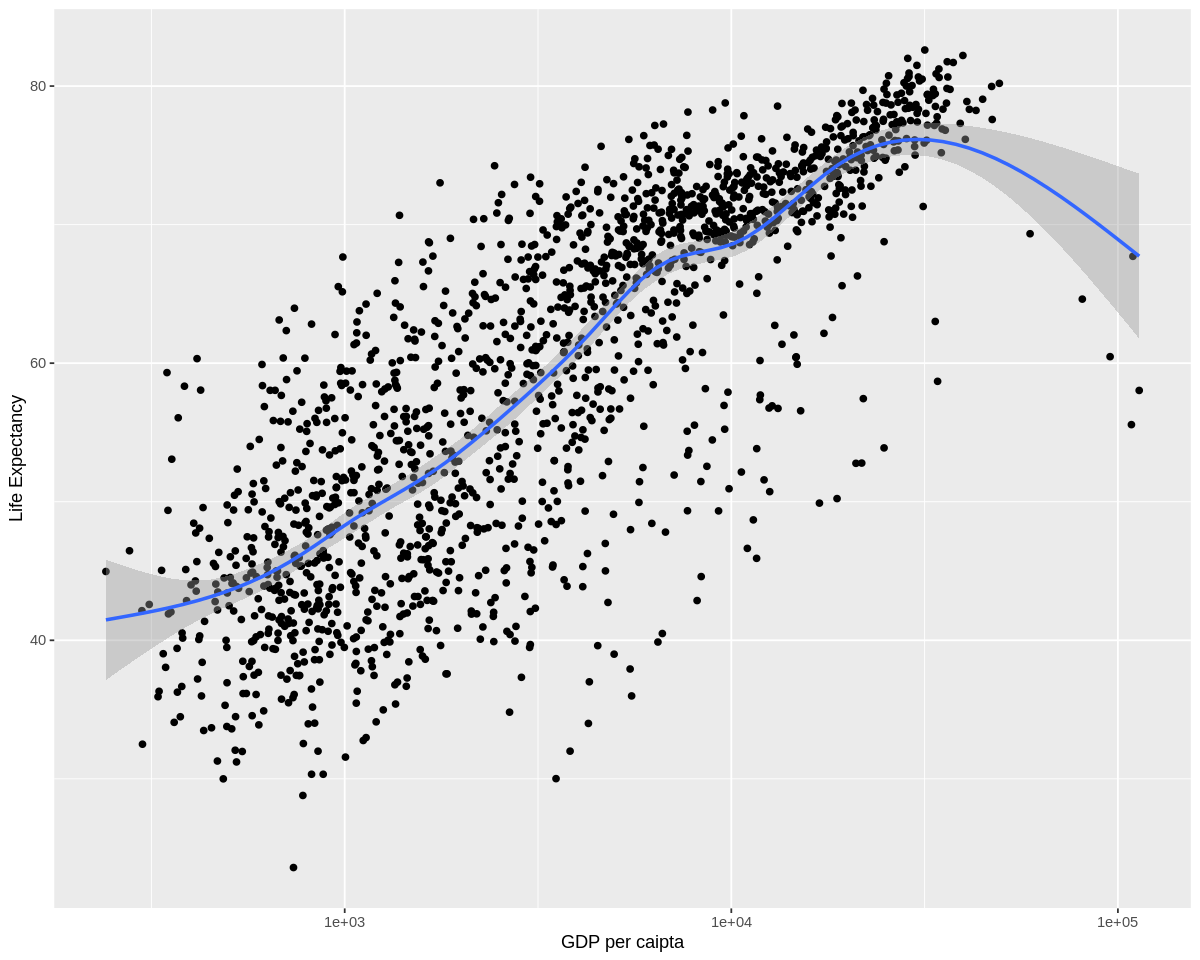

In [117]:
## now let's make our plot
ggplot(data = numeric_df, aes(x = gdpPercap, y = lifeExp)) +
  geom_point() +
  geom_smooth() +
  scale_x_log10() + ## the scale_x_log10 functions transforms the x-axis by taking log base 10 of the variable.
                    ## This helps to shrink the rather larger values for gdpPercap yet, without losing any information
  labs(x = "GDP per caipta", y = "Life Expectancy")

### Exercise 2

In [118]:
## subset categorical variables (columns) from the dataset
cat_df <- select_if(gapminder, negate(is.numeric))
head(cat_df)

country,continent
<fct>,<fct>
Afghanistan,Asia
Afghanistan,Asia
Afghanistan,Asia
Afghanistan,Asia
Afghanistan,Asia
Afghanistan,Asia


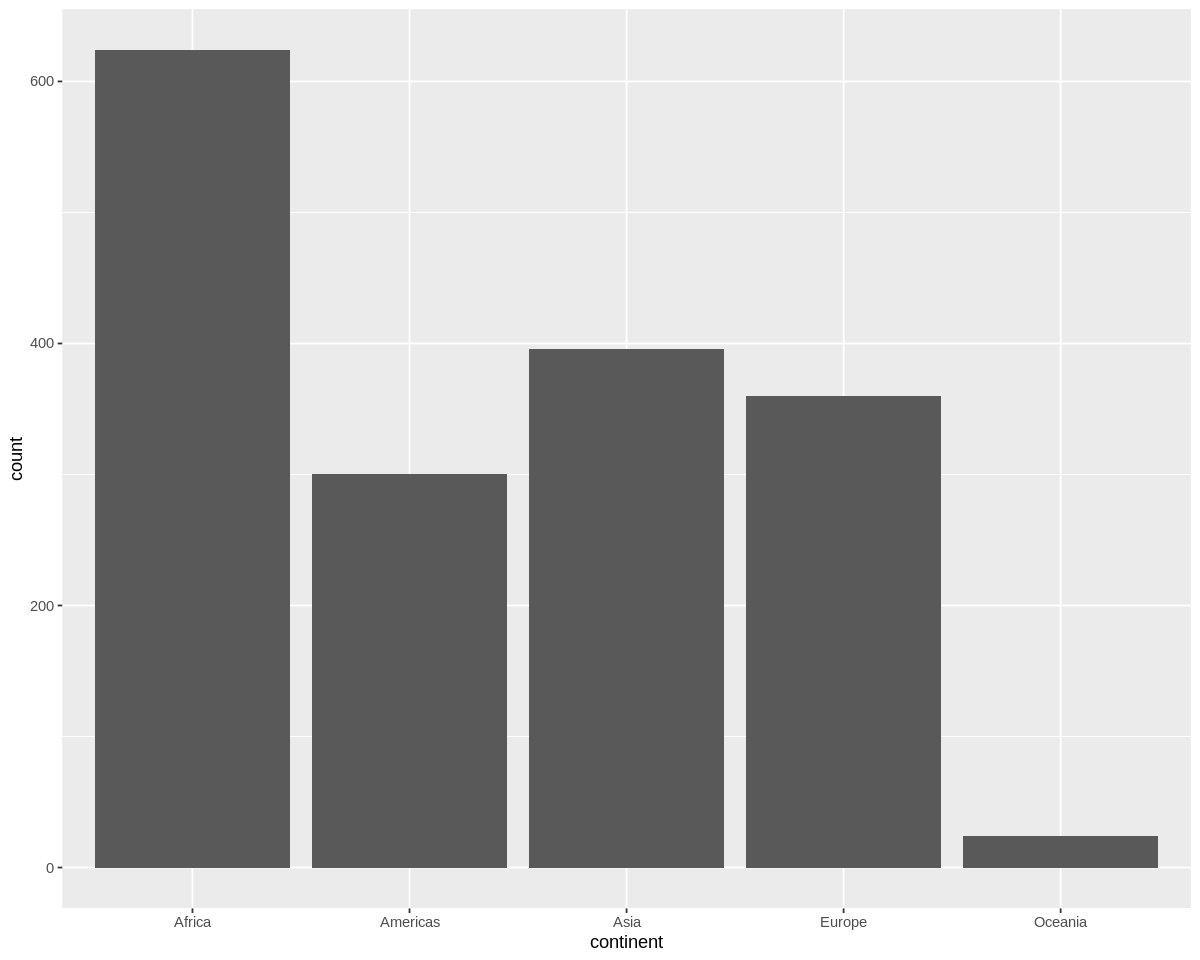

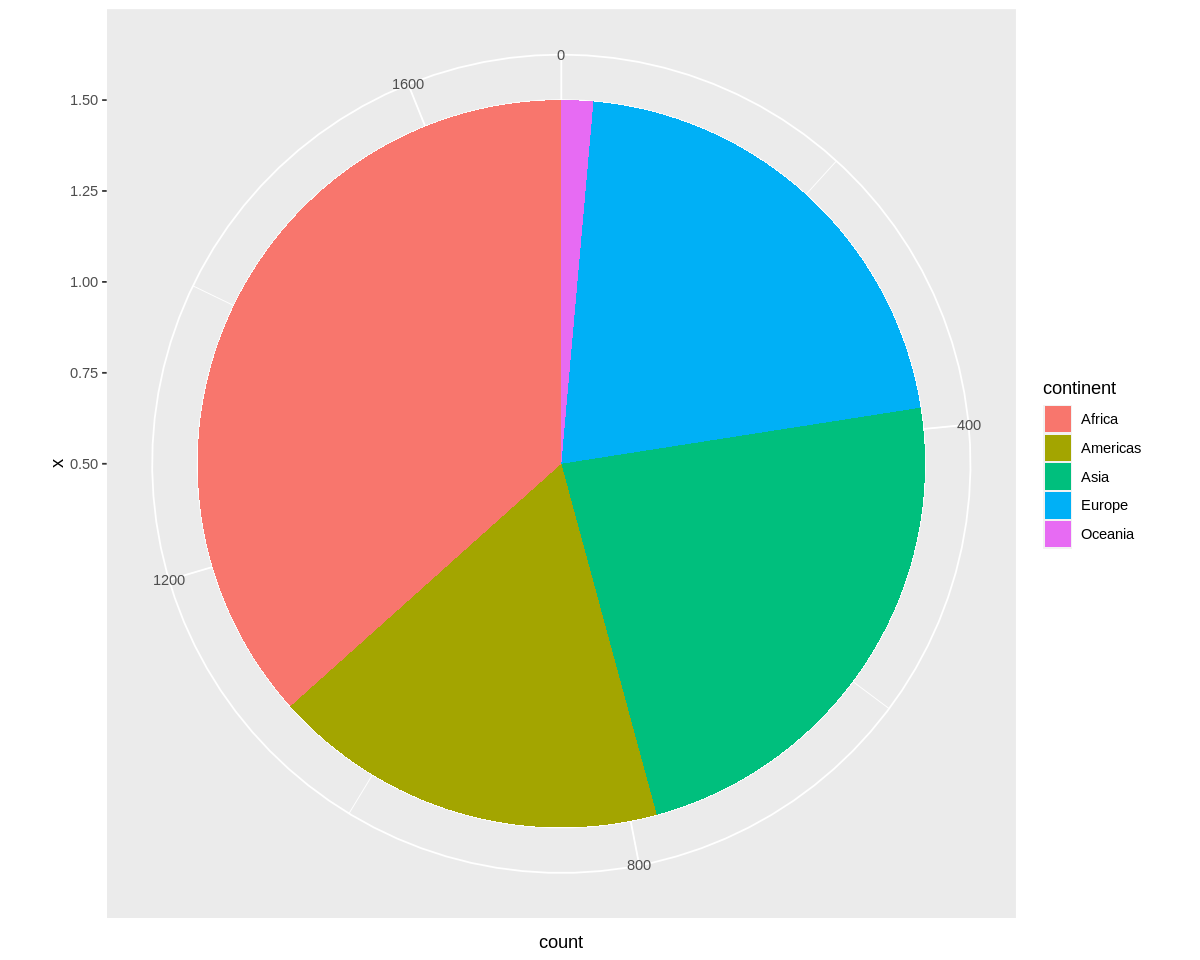

In [119]:
## now let's make our plot
## bar chart
ggplot(data = cat_df) +
  geom_bar(mapping = aes(x = continent))


## now our pie chart
ggplot(data = cat_df) +
  geom_bar(mapping = aes(x = 1, fill = continent), width = 1) +
  coord_polar(theta = "y") 

<br><br>

## 3. Data Visualization

## 3.1 Review

Now, let's review lab 1. We look at the general building blocks (7) of ggplot together with the general syntax (structure of code), as recapped below:  

| Element| Description|
|:---   |:---|
|Data    | The dataset being plotted|
|Aesthetics | The scales onto which we map our data|
|Geometries | The visual elements used for our data|
|Facets | Plotting small multiples|
|Statistics | Representations of our data to aid understanding|
|Coordinates | The space on which the data will be plotted|
|Themes | All non-data ink|

_Source: DataCamp_

Syntax:
> `ggplot(data = <DATA>) +`   
>  &nbsp; &nbsp;&nbsp;&nbsp;`<GEOM_FUNCTION>( `  
> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`mapping = aes(<MAPPINGS>),`  
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`stat = <STAT>, `  
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`position = <POSITION>`  
>  &nbsp; &nbsp;&nbsp;&nbsp;`) + `   
> &nbsp; &nbsp;&nbsp;&nbsp; `<COORDINATE_FUNCTION> + `   
> &nbsp; &nbsp;&nbsp;&nbsp;` <FACET_FUNCTION> +`  
>  &nbsp; &nbsp;&nbsp;&nbsp;`<LABS>`   



## 3.2 Statistical Transformations
`stats` are numbers calculated from your data (count, mean, proportion, etc)

### Example 3.2.1 Bar chat (Count vs Proportion)

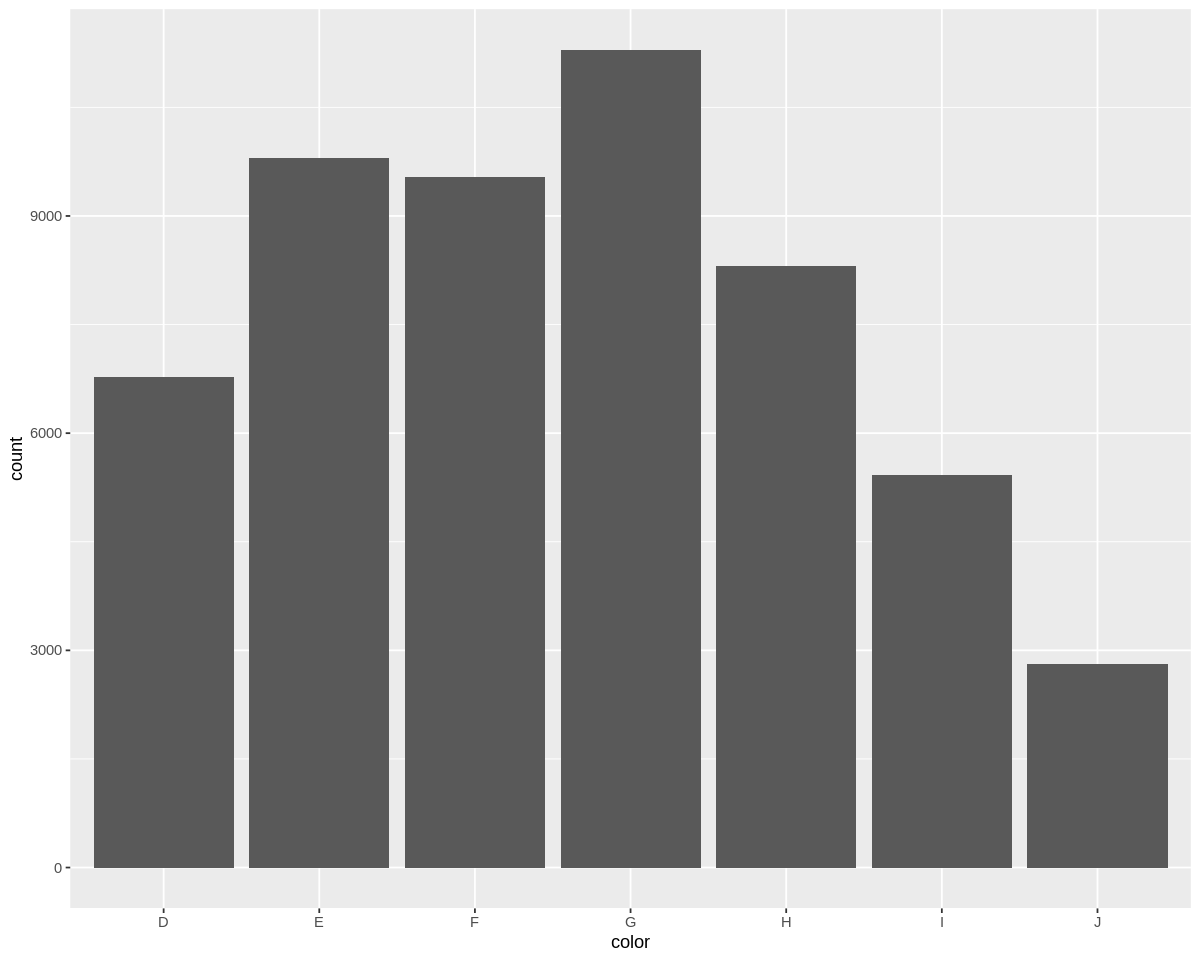

In [120]:
#bar chart with count (default stat)
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = color))

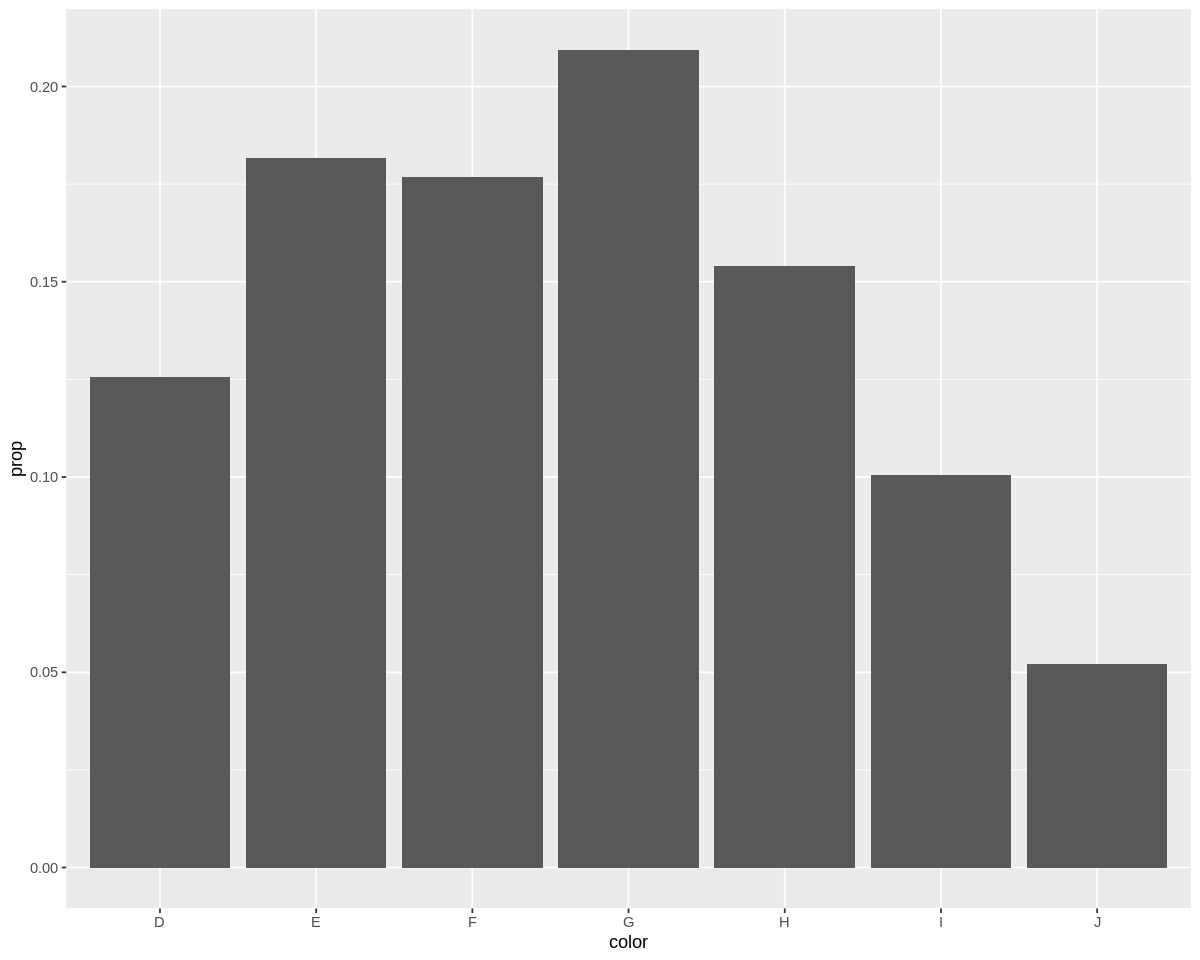

In [121]:
## bar chart with prroportion
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = color, y = stat(prop), group = 1))

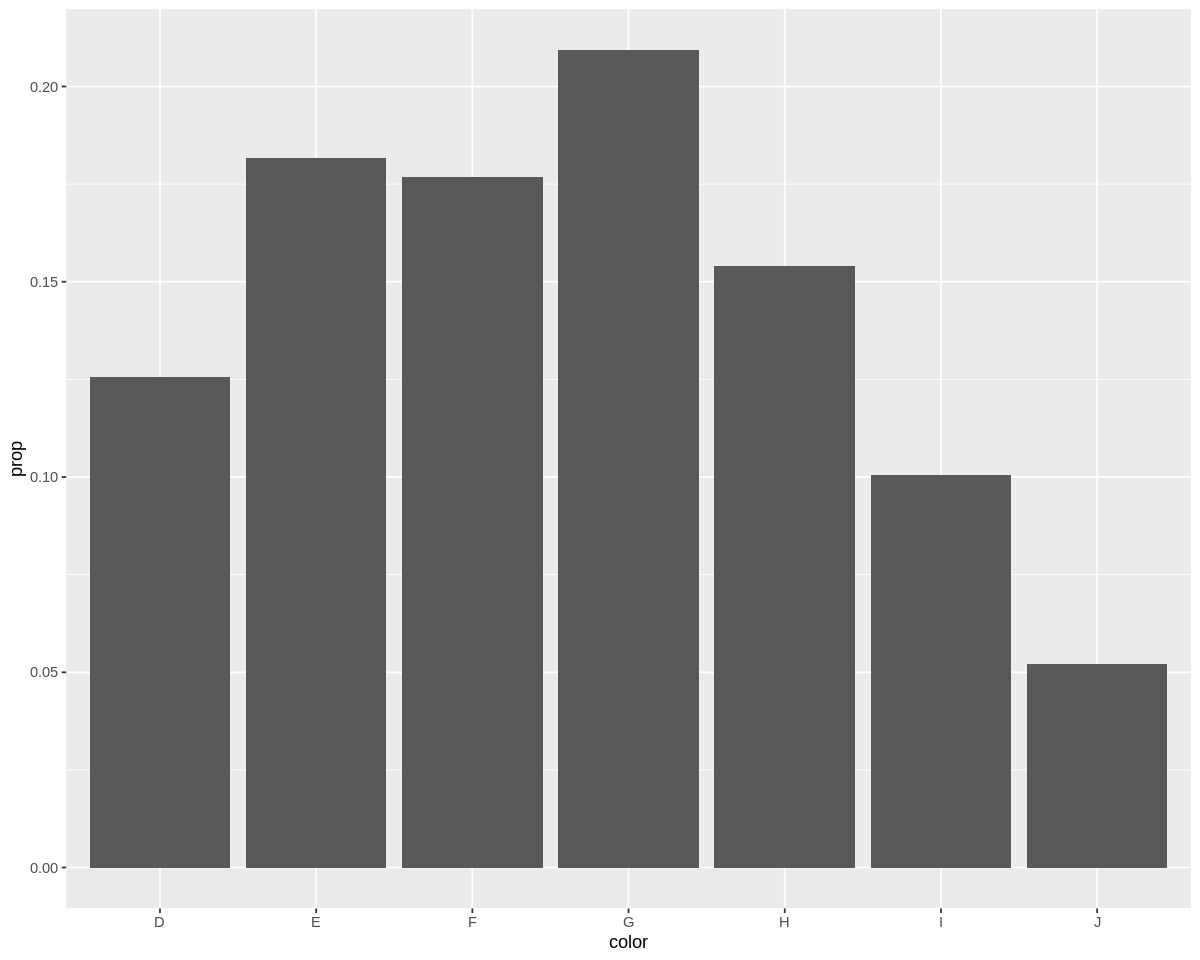

In [122]:
## Alternatively
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = color, y = ..prop.., group = 1))  ## replace y = stat(prop) with y = ..prop..

<br>   

## 3.3 Position Adjustments

### Example 3.3.1 Bar chat (position by stacking vs dodging vs filling)

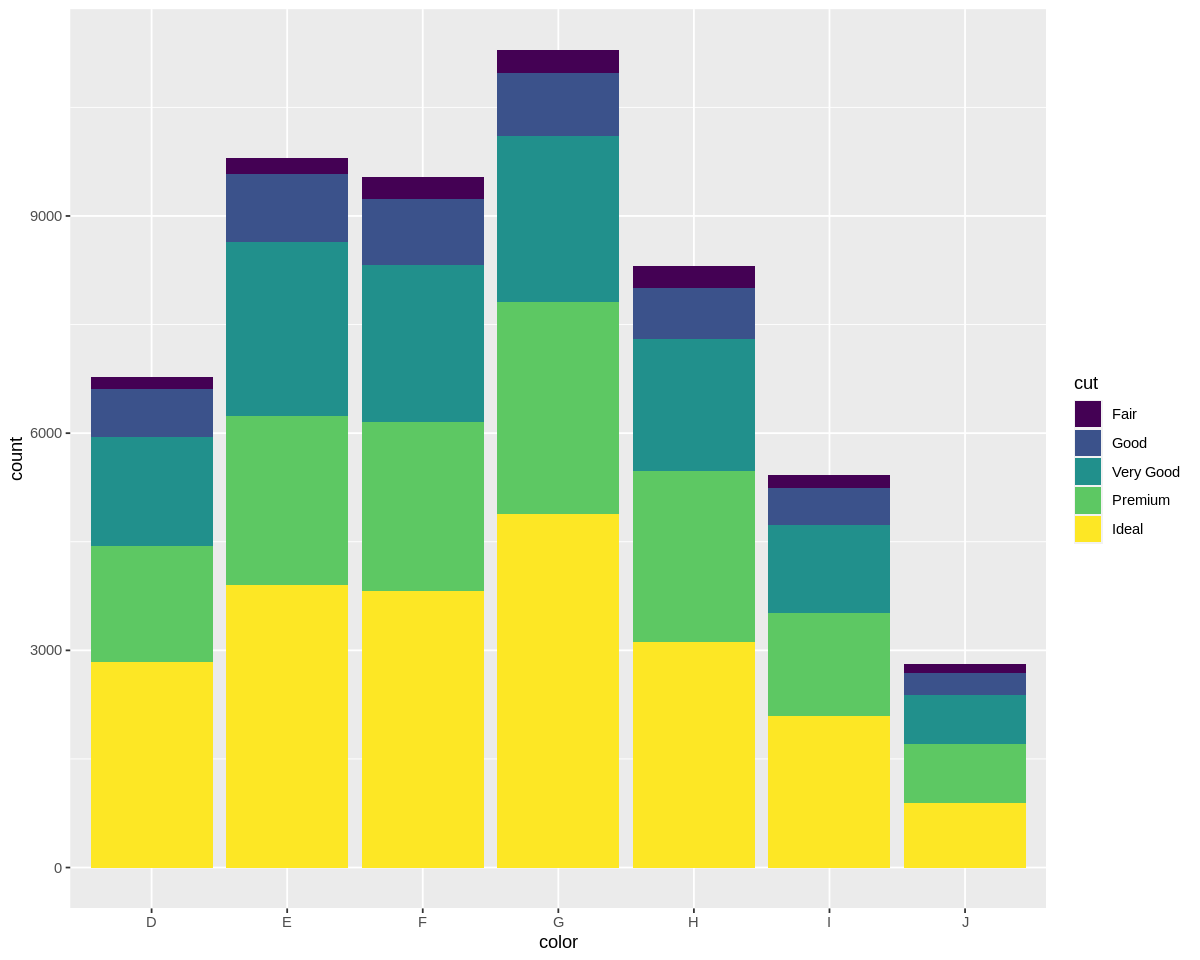

In [123]:
## fill the previous plot by cut
## we position by stacking which is the default
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = color, fill = cut), position = "stack")

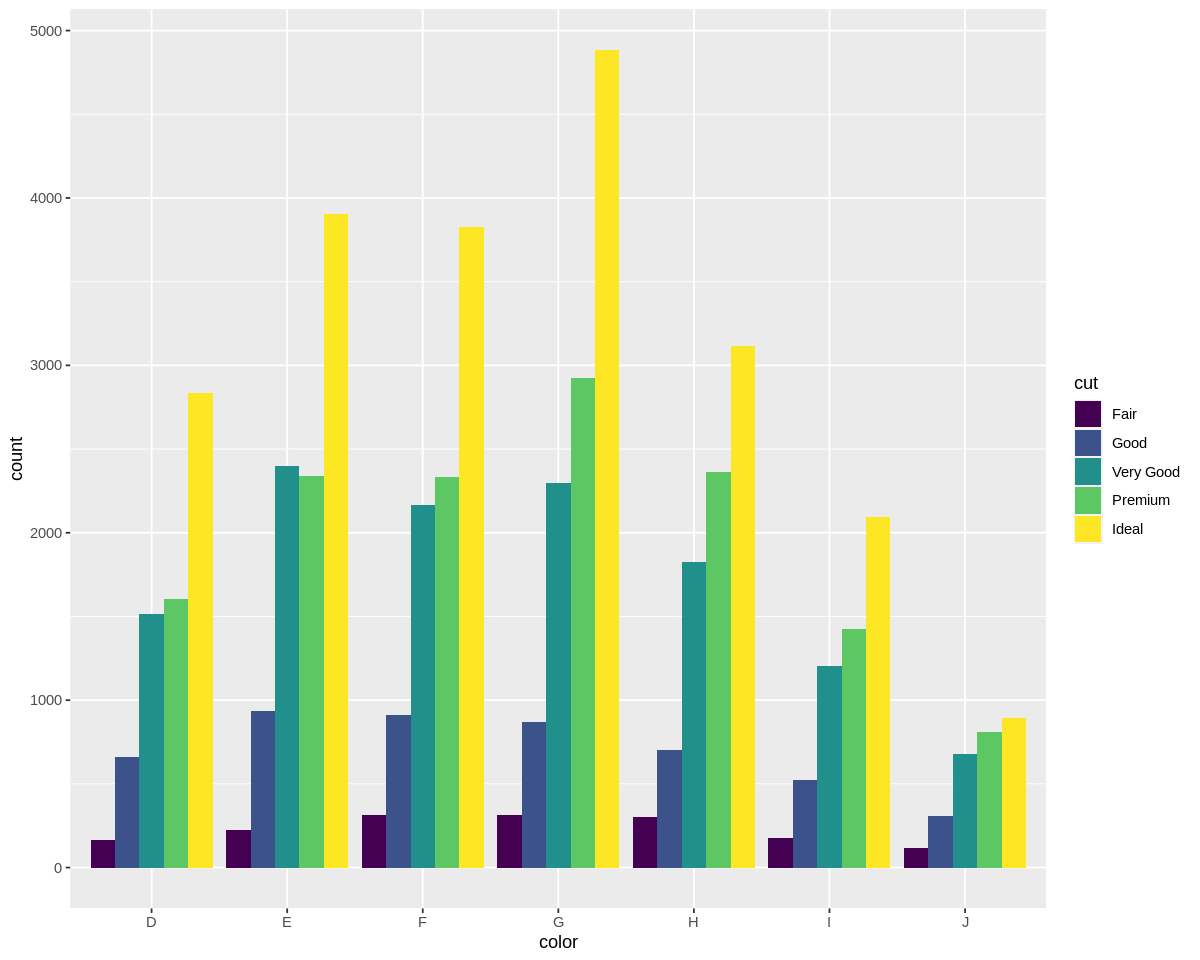

In [124]:
## position by dodging.
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = color, fill = cut), position = "dodge")

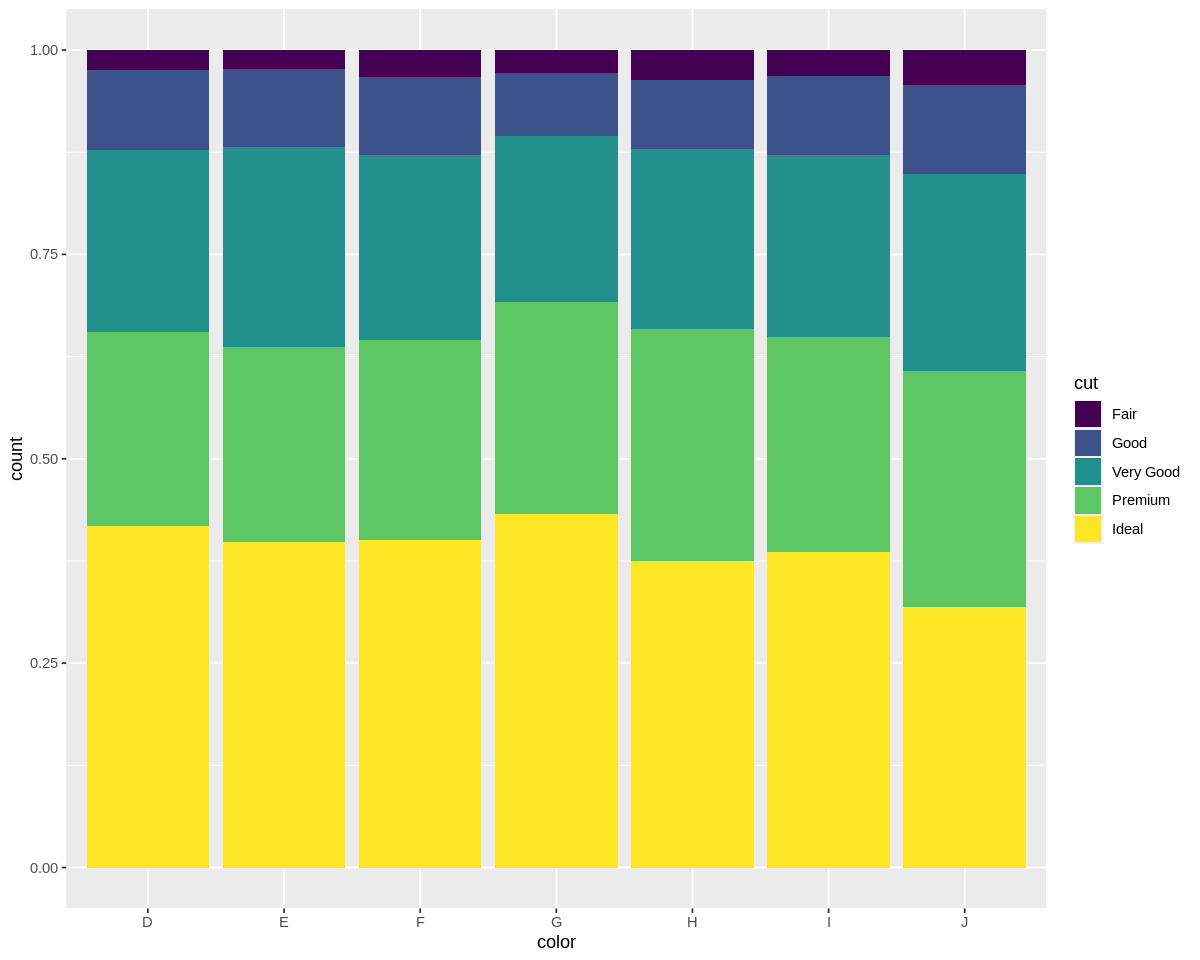

In [125]:
## position by filling
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = color, fill = cut), position = "fill")

<br>   
## 3.4 Coordinate Systems


### Example 3.4.1 Orienting the coordinates of your plot

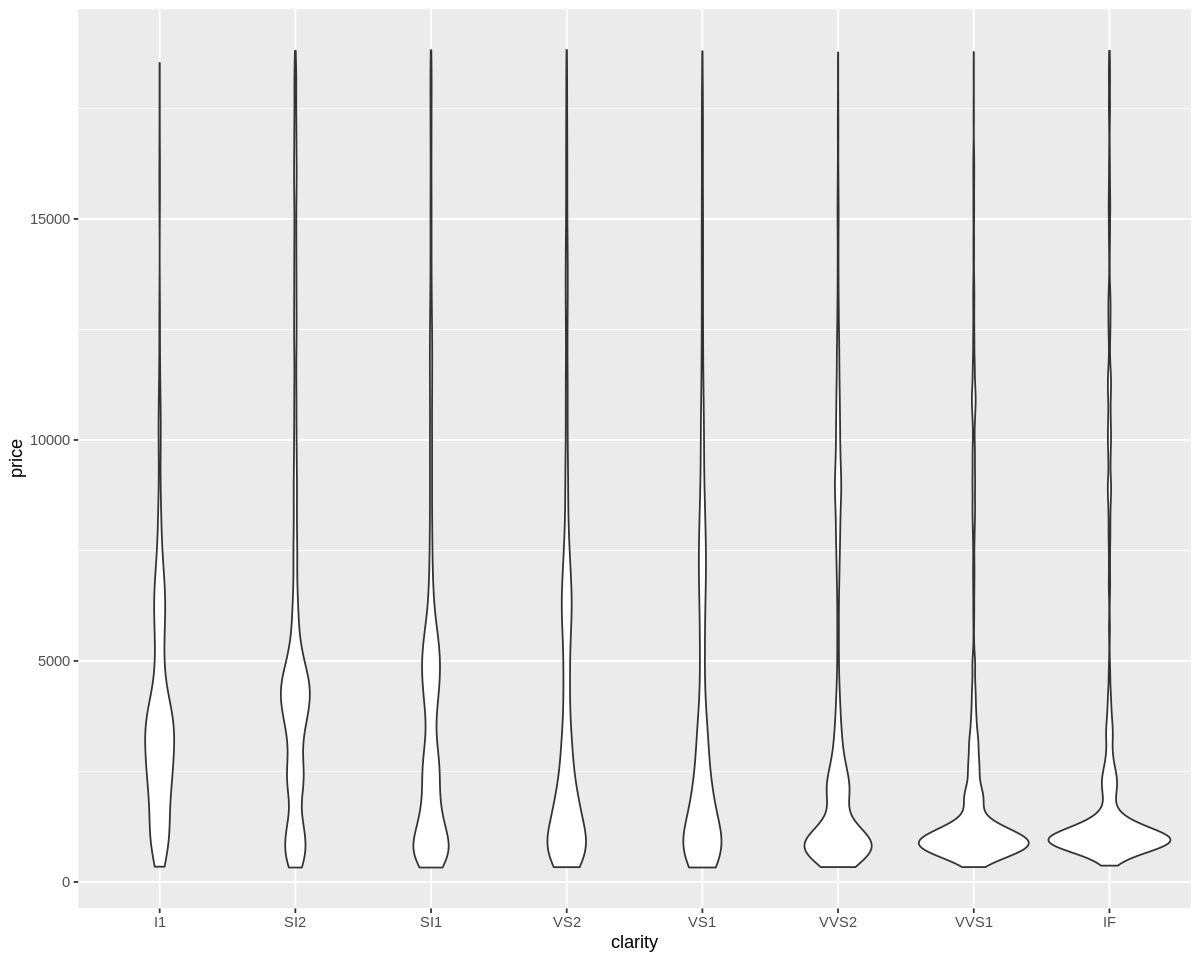

In [126]:
## original coordinate
ggplot(data = diamonds) +
  geom_violin(mapping = aes(x = clarity, y = price))

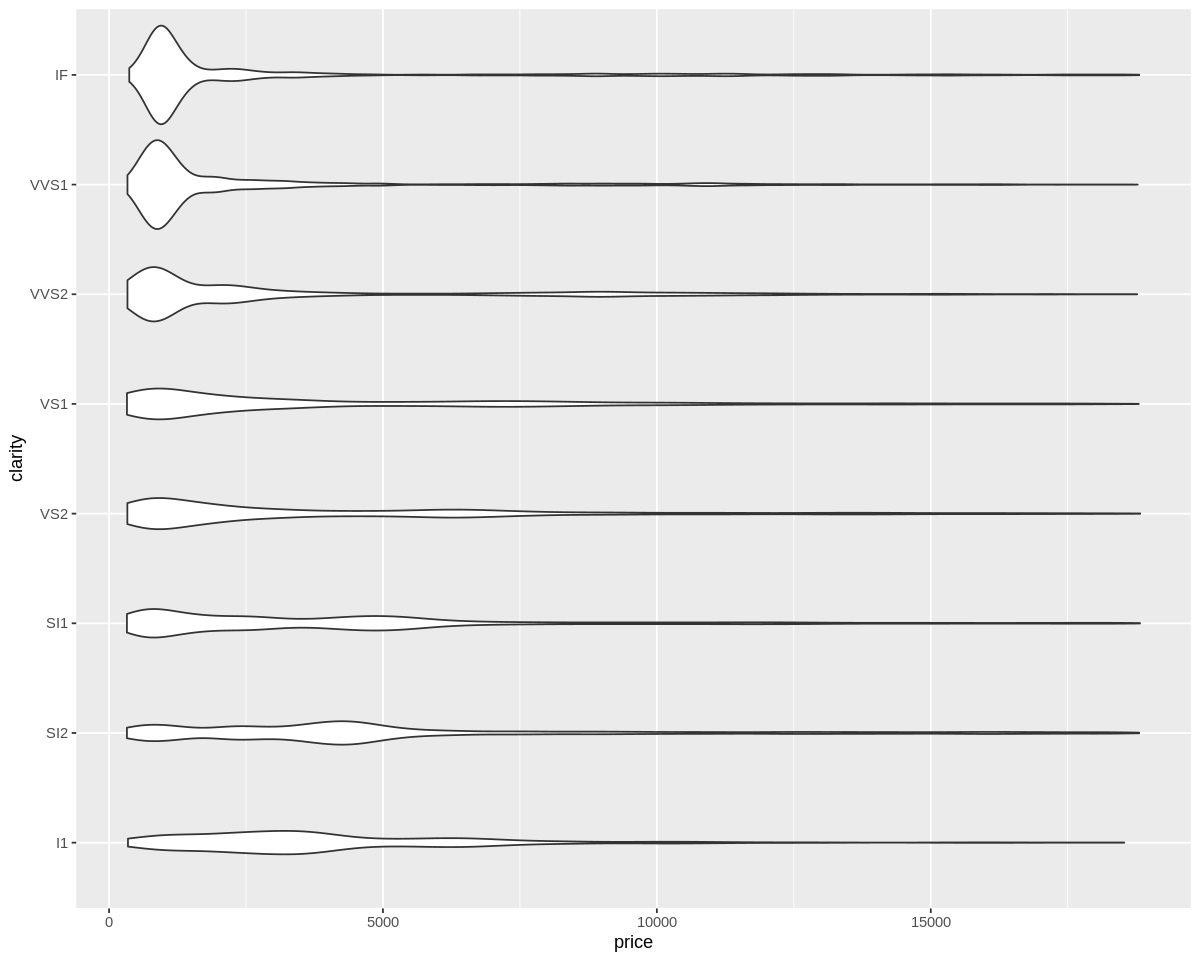

In [127]:
## coord_flip:
ggplot(data = diamonds) +
  geom_violin(mapping = aes(x = clarity, y = price)) +
  coord_flip()

### Example 3.4.2 Creating a pie chart from a bar char

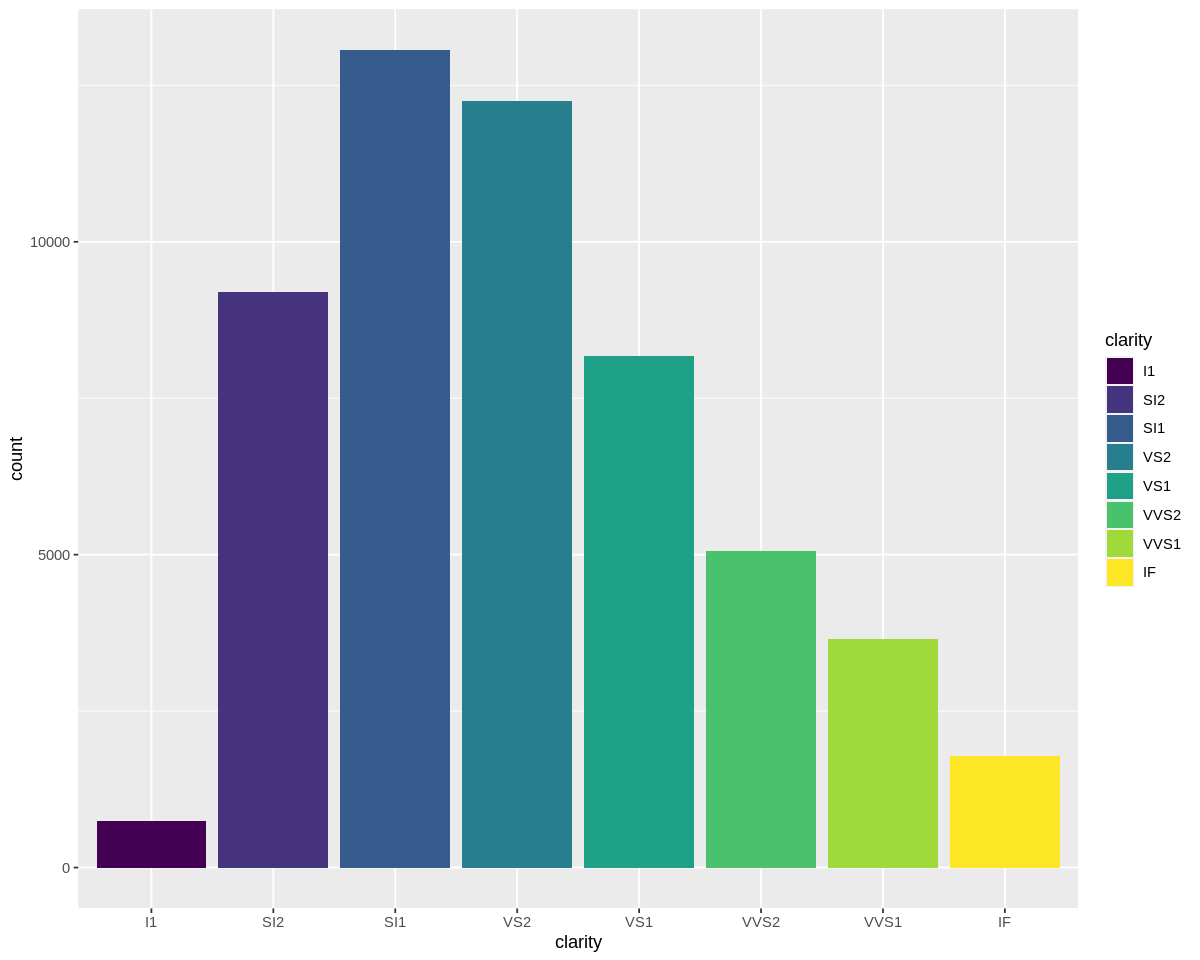

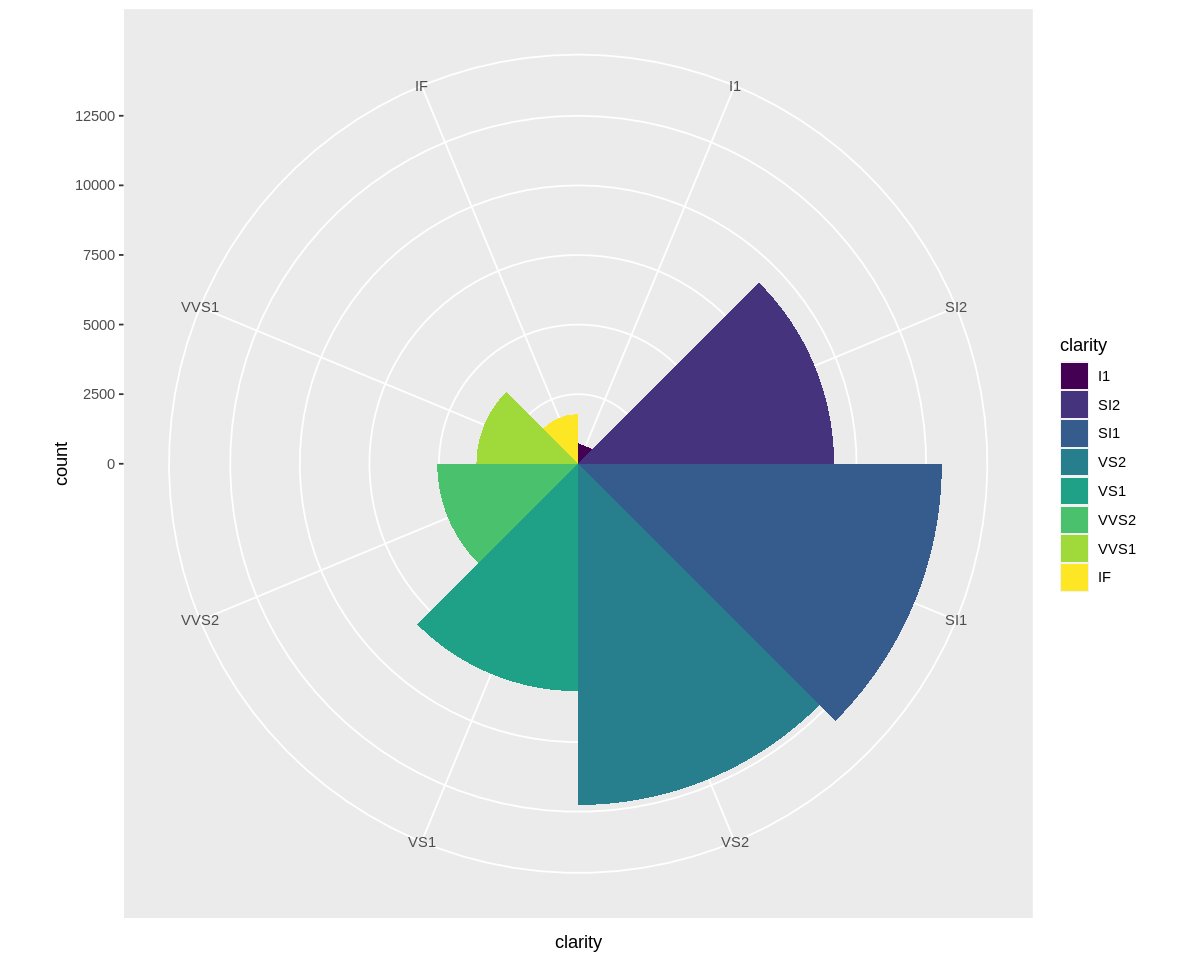

In [128]:
## Polar coordinate
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = clarity, fill = clarity))

ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = clarity, fill = clarity), width = 1) +
  coord_polar()

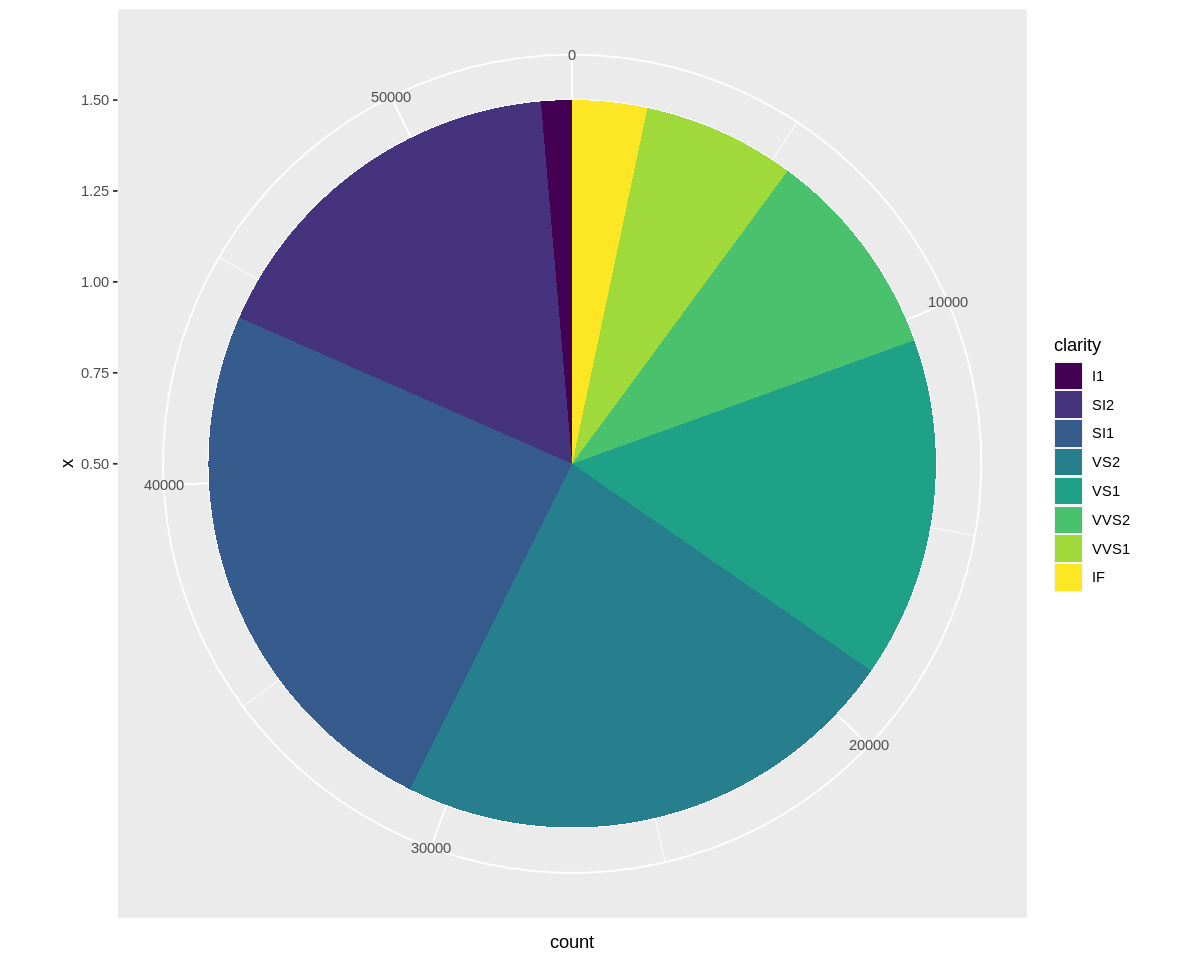

In [129]:
## pie chart
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = 1, fill = clarity), width = 1) +
  coord_polar(theta = "y") 